# **Installing Numba it fix the numpy library bug**

In [1]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Installing Pycaret Library**

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Installing Interactive Visual Display library**


In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# **Importing Dataset : My Student ID is 991589630 so I got the Red Wine Quality Data set**

In [4]:
import pandas as pd
import numpy as np

In [5]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [6]:
dataset = pd.read_csv('/content/winequality-red.csv', sep=";")

In [7]:
print("Datset shape is :", dataset.shape)
dataset

Datset shape is : (1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

# **Dataset Information**

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Withhelding some Records from the Orginal Dataset to be used for Predition**

In [9]:
data = dataset.sample(frac=0.8, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1279, 12)
Unseen Data For Predictions: (320, 12)


### **Setting up the Environment in PyCaret**

In [10]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'quality', session_id=123)

Description             Value
0                               session_id               123
1                                   Target           quality
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data        (1279, 12)
5                           Missing Values             False
6                         Numeric Features                11
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (895, 11)
12                    Transformed Test Set         (384, 11)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              2e6d
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste



### **Comparing all the Models**

In [11]:
best = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.6626  0.4082  0.3809  0.6340   
et                 Extra Trees Classifier    0.6525  0.4100  0.3726  0.6239   
gbc          Gradient Boosting Classifier    0.6324  0.3854  0.3752  0.6165   
lightgbm  Light Gradient Boosting Machine    0.6134  0.3955  0.3500  0.5902   
lr                    Logistic Regression    0.5800  0.3630  0.2800  0.5308   
ridge                    Ridge Classifier    0.5766  0.0000  0.2566  0.4900   
lda          Linear Discriminant Analysis    0.5733  0.3633  0.2958  0.5434   
dt               Decision Tree Classifier    0.5476  0.3225  0.3488  0.5547   
ada                  Ada Boost Classifier    0.5408  0.2782  0.2392  0.4477   
qda       Quadratic Discriminant Analysis    0.5162  0.3396  0.3492  0.5169   
nb                            Naive Bayes    0.4839  0.3418  0.3202  0.5197   
knn                K Neighbors Classifier    0.4806  0.3060  0.2240  0.4471   
dummy                    Dummy Classifier    0.4179  0.2500  0.1833  0.1747   
svm                   SVM - Linear Kernel    0.3362  0.0000  0.2217  0.3522   

              F1   Kappa     MCC  TT (Sec)  
rf        0.6418  0.4495  0.4545     0.294  
et        0.6314  0.4325  0.4370     0.233  
gbc       0.6201  0.4119  0.4150     1.081  
lightgbm  0.5966  0.3748  0.3783     0.433  
lr        0.5481  0.2998  0.3052     0.988  
ridge     0.5237  0.2790  0.2893     0.014  
lda       0.5558  0.3092  0.3113     0.016  
dt        0.5484  0.3029  0.3045     0.019  
ada       0.4842  0.2205  0.2335     0.117  
qda       0.5084  0.2606  0.2650     0.016  
nb        0.4907  0.2426  0.2481     0.017  
knn       0.4583  0.1517  0.1539     0.023  
dummy     0.2464  0.0000  0.0000     0.011  
svm       0.2520  0.0733  0.1086     0.031

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


### **Create a  Model**

### a. Decision tree Classifier

In [12]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.5778  0.6963  0.3079  0.5968  0.5822  0.3631  0.3663
1       0.5222  0.6389  0.2725  0.5214  0.5139  0.2699  0.2745
2       0.4667  0.6090  0.2378  0.4967  0.4797  0.2040  0.2048
3       0.5111  0.6194  0.2680  0.5132  0.5118  0.2401  0.2404
4       0.5556  0.6612  0.2708  0.5567  0.5554  0.3081  0.3087
5       0.5843  0.0000  0.3697  0.5825  0.5809  0.3562  0.3574
6       0.5730  0.0000  0.3397  0.5758  0.5687  0.3254  0.3294
7       0.5843  0.0000  0.5389  0.5853  0.5845  0.3509  0.3511
8       0.4831  0.0000  0.4175  0.4891  0.4847  0.2043  0.2047
9       0.6180  0.0000  0.4649  0.6296  0.6224  0.4071  0.4082
Mean    0.5476  0.3225  0.3488  0.5547  0.5484  0.3029  0.3045
Std     0.0468  0.3232  0.0934  0.0448  0.0455  0.0669  0.0672

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [13]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### b. K Neighbours Classifer

In [14]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.4889  0.6124  0.2225  0.4707  0.4710  0.1687  0.1705
1       0.4333  0.6033  0.1878  0.3955  0.4086  0.0654  0.0664
2       0.4222  0.5614  0.1712  0.3812  0.3963  0.0709  0.0724
3       0.4333  0.6115  0.1757  0.3858  0.4080  0.0811  0.0823
4       0.4889  0.6711  0.2073  0.4499  0.4646  0.1599  0.1621
5       0.4944  0.0000  0.2756  0.4824  0.4868  0.1883  0.1888
6       0.5506  0.0000  0.2516  0.5384  0.5358  0.2694  0.2739
7       0.4607  0.0000  0.2219  0.4106  0.4307  0.1012  0.1043
8       0.5506  0.0000  0.2795  0.5129  0.5260  0.2642  0.2671
9       0.4831  0.0000  0.2470  0.4433  0.4551  0.1478  0.1508
Mean    0.4806  0.3060  0.2240  0.4471  0.4583  0.1517  0.1539
Std     0.0429  0.3070  0.0371  0.0516  0.0461  0.0705  0.0712

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


### C. Logistic Regression

In [15]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6222  0.7648  0.2766  0.5655  0.5851  0.3761  0.3840
1       0.5556  0.6964  0.2495  0.5145  0.5251  0.2620  0.2665
2       0.5111  0.6965  0.2072  0.4344  0.4696  0.1837  0.1875
3       0.5556  0.7136  0.2374  0.5017  0.5183  0.2579  0.2634
4       0.5778  0.7583  0.2552  0.5326  0.5516  0.3005  0.3032
5       0.6404  0.0000  0.3461  0.6091  0.6180  0.4053  0.4105
6       0.6292  0.0000  0.3543  0.6113  0.6098  0.3875  0.3951
7       0.6067  0.0000  0.3294  0.5792  0.5832  0.3450  0.3495
8       0.5393  0.0000  0.2741  0.4887  0.5081  0.2295  0.2330
9       0.5618  0.0000  0.2703  0.4715  0.5119  0.2500  0.2590
Mean    0.5800  0.3630  0.2800  0.5308  0.5481  0.2998  0.3052
Std     0.0406  0.3636  0.0460  0.0564  0.0467  0.0713  0.0720

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


### D. Random Forest Classifier

In [16]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7000  0.8510  0.3446  0.6544  0.6705  0.5126  0.5218
1       0.7111  0.8389  0.3613  0.6699  0.6860  0.5281  0.5329
2       0.6333  0.7894  0.2932  0.6085  0.6138  0.4068  0.4100
3       0.6222  0.7893  0.3374  0.5820  0.5992  0.3896  0.3935
4       0.6556  0.8134  0.2865  0.6244  0.6337  0.4351  0.4403
5       0.6404  0.0000  0.3845  0.6272  0.6309  0.4274  0.4304
6       0.6966  0.0000  0.3985  0.6750  0.6760  0.4968  0.5032
7       0.6517  0.0000  0.5590  0.6274  0.6354  0.4308  0.4337
8       0.6517  0.0000  0.3719  0.6190  0.6294  0.4240  0.4286
9       0.6629  0.0000  0.4719  0.6522  0.6437  0.4435  0.4511
Mean    0.6626  0.4082  0.3809  0.6340  0.6418  0.4495  0.4545
Std     0.0286  0.4086  0.0778  0.0273  0.0263  0.0442  0.0454

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


# **Tune a Model (for all my 4 models)**

### a. Decision Tree
### b. KNN Classifier
### c. Logistic  Regression
### d. Random Forest Classifier


In [17]:
# Tuning for Decision Tree
tuned_dt = tune_model(dt)
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.5667  0.7383  0.2662  0.5428  0.5542  0.3134  0.3139
1       0.5222  0.6539  0.2725  0.4884  0.4873  0.2280  0.2419
2       0.5556  0.7155  0.2495  0.5158  0.4986  0.2661  0.2994
3       0.5222  0.6787  0.2725  0.4747  0.4777  0.2362  0.2517
4       0.6000  0.7368  0.2762  0.5628  0.5727  0.3363  0.3438
5       0.6404  0.0000  0.3326  0.6116  0.6049  0.3938  0.4026
6       0.5730  0.0000  0.3524  0.5594  0.5647  0.3209  0.3222
7       0.5169  0.0000  0.2970  0.4808  0.4795  0.1990  0.2116
8       0.5169  0.0000  0.3216  0.4834  0.4974  0.2143  0.2164
9       0.5730  0.0000  0.3049  0.5343  0.5434  0.2859  0.2907
Mean    0.5587  0.3523  0.2945  0.5254  0.5280  0.2794  0.2894
Std     0.0388  0.3531  0.0313  0.0426  0.0430  0.0588  0.0571

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [18]:
# Tuning for knn neighbour Classifier
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6111  0.7013  0.2599  0.5480  0.5685  0.3506  0.3585
1       0.5556  0.6786  0.2374  0.5637  0.5141  0.2495  0.2573
2       0.5000  0.5853  0.2027  0.4218  0.4570  0.1615  0.1660
3       0.5000  0.6159  0.2270  0.5166  0.4737  0.1604  0.1659
4       0.5222  0.7186  0.2086  0.4372  0.4758  0.1811  0.1870
5       0.5169  0.0000  0.2612  0.5507  0.4834  0.1780  0.1834
6       0.5056  0.0000  0.2682  0.4973  0.4815  0.1668  0.1703
7       0.5393  0.0000  0.2596  0.4627  0.4967  0.2215  0.2279
8       0.5056  0.0000  0.2578  0.4649  0.4752  0.1684  0.1719
9       0.5169  0.0000  0.2632  0.4859  0.4821  0.1826  0.1877
Mean    0.5273  0.3300  0.2446  0.4949  0.4908  0.2021  0.2076
Std     0.0326  0.3319  0.0229  0.0467  0.0296  0.0564  0.0576

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [19]:
#Tuning for Logestic Regression
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6222  0.7557  0.2887  0.5712  0.5917  0.3863  0.3921
1       0.5556  0.6936  0.2617  0.5202  0.5297  0.2661  0.2699
2       0.5000  0.7007  0.2149  0.4563  0.4764  0.1887  0.1900
3       0.5889  0.7198  0.2874  0.5533  0.5652  0.3248  0.3285
4       0.5889  0.7654  0.2720  0.5508  0.5672  0.3229  0.3252
5       0.6404  0.0000  0.3587  0.6104  0.6226  0.4114  0.4144
6       0.6067  0.0000  0.3558  0.5839  0.5917  0.3565  0.3595
7       0.6292  0.0000  0.3405  0.6019  0.6056  0.3830  0.3882
8       0.5393  0.0000  0.2886  0.5054  0.5164  0.2339  0.2372
9       0.5843  0.0000  0.3103  0.5458  0.5553  0.3047  0.3093
Mean    0.5856  0.3635  0.2979  0.5499  0.5622  0.3178  0.3214
Std     0.0413  0.3641  0.0426  0.0443  0.0423  0.0677  0.0684

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [20]:
#Tuning for Random Forest Classifier
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.5778  0.7516  0.2586  0.5330  0.5487  0.3028  0.3078
1       0.5333  0.6747  0.2405  0.4953  0.5045  0.2251  0.2289
2       0.6222  0.7525  0.3252  0.5933  0.6004  0.3929  0.4015
3       0.5333  0.7016  0.2899  0.5226  0.5228  0.2487  0.2511
4       0.5778  0.7230  0.2312  0.4937  0.5320  0.2848  0.2916
5       0.5056  0.0000  0.2694  0.5234  0.5002  0.2082  0.2163
6       0.5281  0.0000  0.3548  0.5423  0.5188  0.2416  0.2521
7       0.4831  0.0000  0.2677  0.4317  0.4403  0.1567  0.1661
8       0.6067  0.0000  0.3503  0.5688  0.5781  0.3533  0.3625
9       0.5281  0.0000  0.3416  0.5233  0.4972  0.2691  0.2851
Mean    0.5496  0.3603  0.2929  0.5228  0.5243  0.2683  0.2763
Std     0.0423  0.3610  0.0441  0.0418  0.0426  0.0657  0.0660

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **Plotting a Model (for all my 4 models)**

### a. Decision Tree
### b. KNN Classifier
### c. Logistic  Regression
### d. Random Forest Classifier

## **Confusion Matrix**

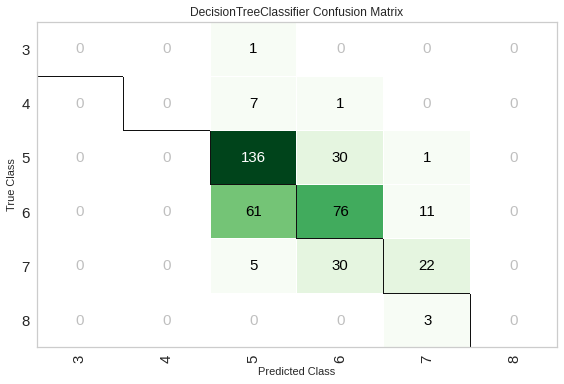

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(tuned_dt, plot = 'confusion_matrix')

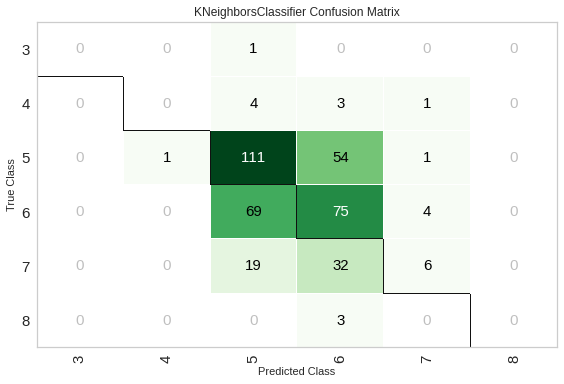

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
plot_model(tuned_knn, plot = 'confusion_matrix')

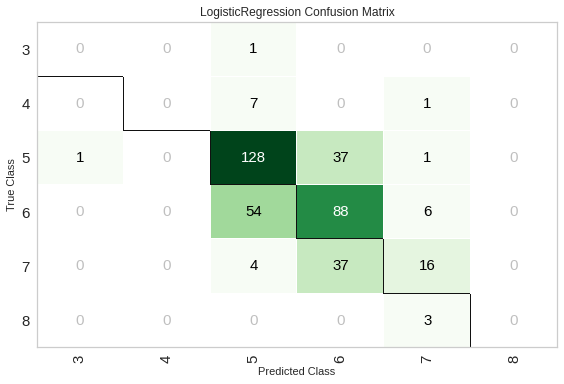

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [23]:
plot_model(tuned_lr, plot = 'confusion_matrix')

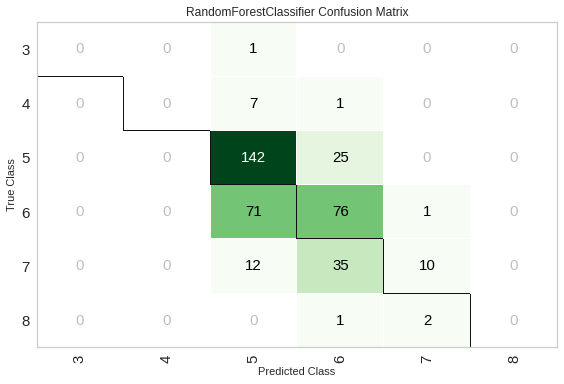

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [24]:
plot_model(tuned_rf, plot = 'confusion_matrix')

# **Classification Report**

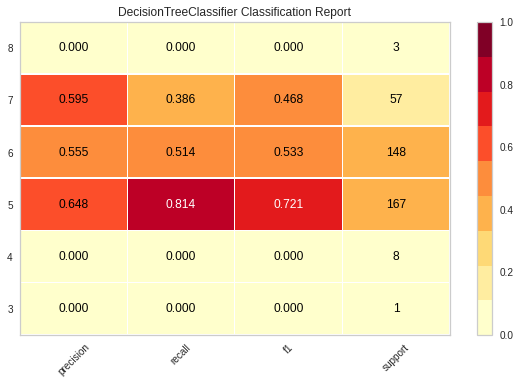

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [25]:
plot_model(tuned_dt, plot = 'class_report')

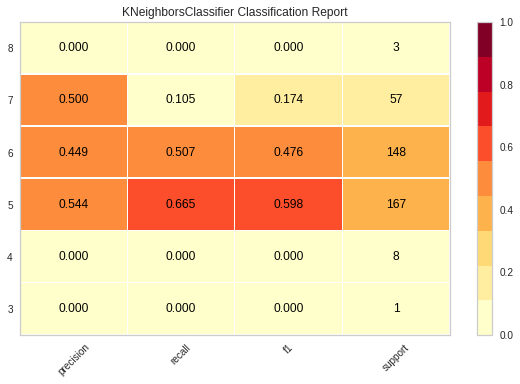

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [26]:
plot_model(tuned_knn, plot = 'class_report')

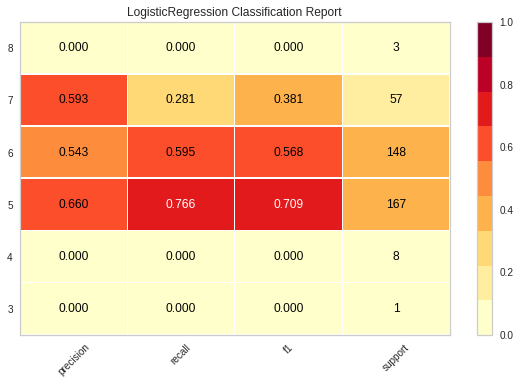

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [27]:
plot_model(tuned_lr, plot = 'class_report')

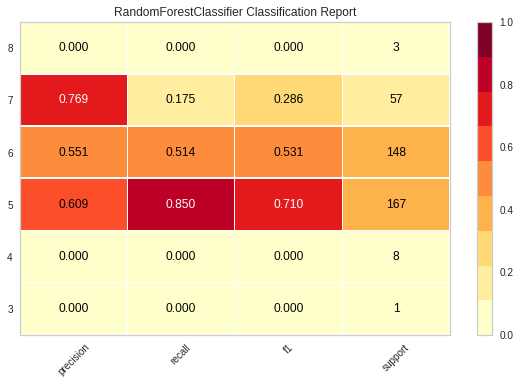

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
plot_model(tuned_rf, plot = 'class_report')

# **Decision Boundary Plot**

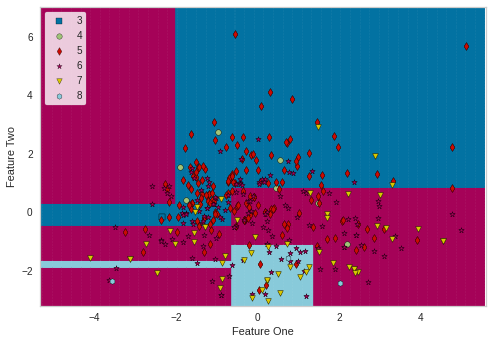

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [66]:
plot_model(tuned_dt, plot='boundary')

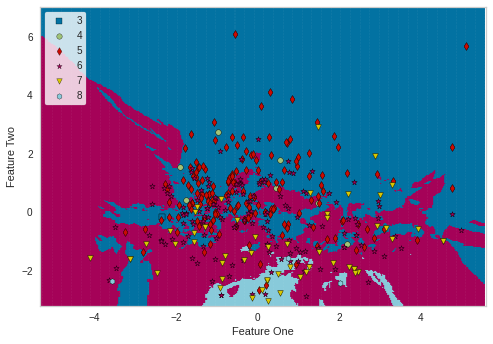

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [67]:
plot_model(tuned_knn, plot='boundary')

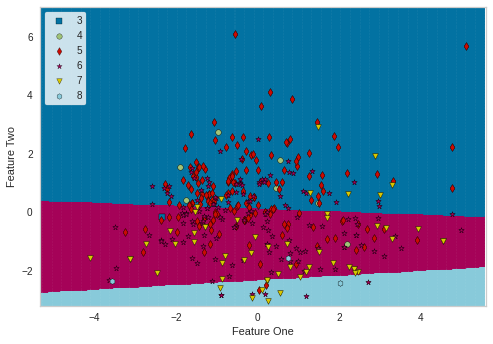

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [68]:
plot_model(tuned_lr, plot='boundary')

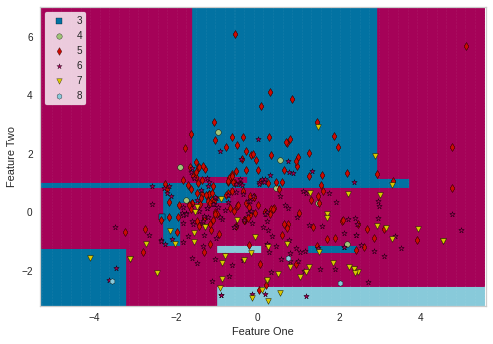

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [69]:
plot_model(tuned_rf, plot='boundary')

# **Prediction Error Plot**


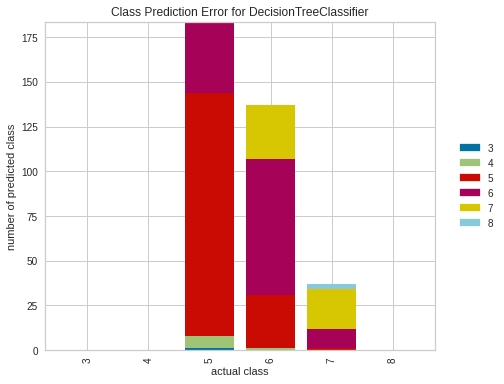

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
plot_model(tuned_dt, plot='error')

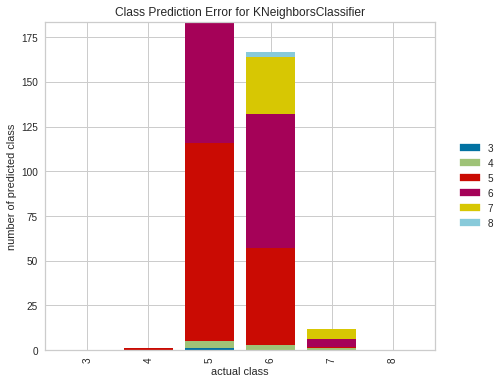

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(tuned_knn, plot='error')

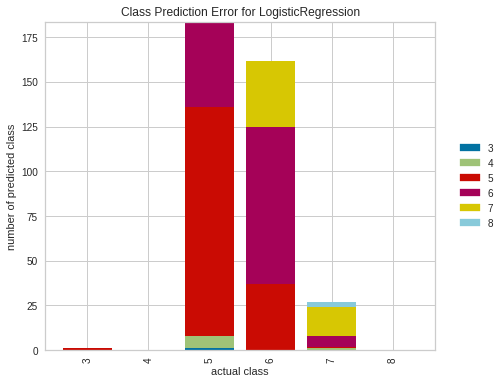

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [31]:
plot_model(tuned_lr, plot='error')

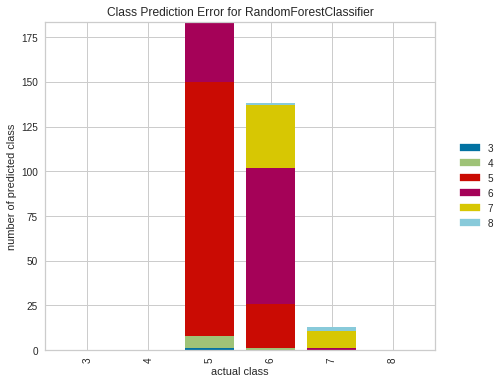

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [32]:
plot_model(tuned_rf, plot='error')

# **Evaluating Model**


In [33]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [35]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [36]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Predict on test / hold-out Sample section**

In [42]:
predict_model(tuned_dt,raw_score=True);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  Kappa  \
0  Decision Tree Classifier    0.6094  0.7298  0.2856  0.5837  0.5888   0.36   

      MCC  
0  0.3657

In [43]:
predict_model(tuned_knn,raw_score=True);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1  Kappa  \
0  K Neighbors Classifier       0.5  0.6443  0.2128  0.4839  0.4696  0.162   

      MCC  
0  0.1663

In [44]:
predict_model(tuned_lr,raw_score=True);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression    0.6042  0.7616  0.2736  0.5843  0.5838  0.3481   

      MCC  
0  0.3526

In [45]:
predict_model(tuned_rf,raw_score=True);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.     F1   Kappa  \
0  Random Forest Classifier    0.5938  0.7137  0.2565  0.5915  0.556  0.3144   

      MCC  
0  0.3289

# **Finalizing Model for Deployment**

In [46]:
final_dt = finalize_model(tuned_dt)
final_knn = finalize_model(tuned_knn)
final_lr = finalize_model(tuned_lr)
final_rf = finalize_model(tuned_rf)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, preso

### Final Decision Tree parameters for deployment


In [47]:
print(final_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### Final K Nearest Neighbour parameters for deployment


In [48]:
#Final K Nearest Neighbour parameters for deployment
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')


### Final Logistic Regression parameters for deployment


In [49]:
print(final_lr)

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Final Random Forest Classifier parameters for deployment


In [50]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


#**Predict** on unseen data

In [ ]:
data_unseen

In [52]:
unseen_predictions = predict_model(final_dt,raw_score=True, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.     F1   Kappa  \
0  Decision Tree Classifier    0.5625  0.7166  0.2659  0.5484  0.535  0.2771   

      MCC  
0  0.2823

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.2             0.280         0.56             1.9      0.075   
1            7.4             0.660         0.00             1.8      0.075   
2            7.3             0.650         0.00             1.2      0.065   
3            7.5             0.500         0.36             6.1      0.071   
4            5.6             0.615         0.00             1.6      0.089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  21.0   0.9946  3.39       0.47   
3                 17.0                 102.0   0.9978  3.35       0.80   
4                 16.0                  59.0   0.9943  3.58       0.52   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.8        6      5   0.0000   0.0526   0.5789   0.3684   0.0000   
1      9.4        5      5   0.0239   0.0622   0.6507   0.2584   0.0048   
2     10.0        7      5   0.0239   0.0622   0.6507   0.2584   0.0048   
3     10.5        5      5   0.0000   0.0250   0.4562   0.4500   0.0688   
4      9.9        5      5   0.0239   0.0622   0.6507   0.2584   0.0048   

   Score_5  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [53]:
unseen_predictions = predict_model(final_knn,raw_score=True, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  K Neighbors Classifier     0.525  0.6738  0.2345  0.4957  0.4962  0.2058   

      MCC  
0  0.2103

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.2             0.280         0.56             1.9      0.075   
1            7.4             0.660         0.00             1.8      0.075   
2            7.3             0.650         0.00             1.2      0.065   
3            7.5             0.500         0.36             6.1      0.071   
4            5.6             0.615         0.00             1.6      0.089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  21.0   0.9946  3.39       0.47   
3                 17.0                 102.0   0.9978  3.35       0.80   
4                 16.0                  59.0   0.9943  3.58       0.52   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.8        6      5      0.0      0.0   0.5294   0.4118   0.0588   
1      9.4        5      5      0.0      0.0   0.5294   0.4706   0.0000   
2     10.0        7      6      0.0      0.0   0.2941   0.6471   0.0588   
3     10.5        5      5      0.0      0.0   0.5882   0.2941   0.1176   
4      9.9        5      5      0.0      0.0   0.7647   0.2353   0.0000   

   Score_5  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [54]:
unseen_predictions_lr = predict_model(final_lr,raw_score=True, data=data_unseen)
unseen_predictions_lr.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy    AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression       0.6  0.771  0.2781  0.5613  0.5777  0.3478   

      MCC  
0  0.3503

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.2             0.280         0.56             1.9      0.075   
1            7.4             0.660         0.00             1.8      0.075   
2            7.3             0.650         0.00             1.2      0.065   
3            7.5             0.500         0.36             6.1      0.071   
4            5.6             0.615         0.00             1.6      0.089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  21.0   0.9946  3.39       0.47   
3                 17.0                 102.0   0.9978  3.35       0.80   
4                 16.0                  59.0   0.9943  3.58       0.52   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.8        6      5   0.0001   0.0081   0.5019   0.4101   0.0782   
1      9.4        5      5   0.0042   0.0473   0.7052   0.2373   0.0059   
2     10.0        7      5   0.0138   0.0438   0.5113   0.4117   0.0180   
3     10.5        5      5   0.0000   0.0410   0.5393   0.3477   0.0716   
4      9.9        5      5   0.0007   0.0375   0.6948   0.2592   0.0075   

   Score_5  
0   0.0016  
1   0.0002  
2   0.0014  
3   0.0005  
4   0.0004

In [55]:
unseen_predictions_rf = predict_model(final_rf,raw_score=True, data=data_unseen)
unseen_predictions_rf.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy    AUC  Recall   Prec.     F1   Kappa  \
0  Random Forest Classifier    0.5125  0.711  0.2593  0.5188  0.511  0.2482   

      MCC  
0  0.2506

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.2             0.280         0.56             1.9      0.075   
1            7.4             0.660         0.00             1.8      0.075   
2            7.3             0.650         0.00             1.2      0.065   
3            7.5             0.500         0.36             6.1      0.071   
4            5.6             0.615         0.00             1.6      0.089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  21.0   0.9946  3.39       0.47   
3                 17.0                 102.0   0.9978  3.35       0.80   
4                 16.0                  59.0   0.9943  3.58       0.52   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.8        6      6   0.0000   0.0000   0.2549   0.5490   0.1569   
1      9.4        5      5   0.0126   0.0503   0.6164   0.3145   0.0063   
2     10.0        7      4   0.0000   0.6667   0.1667   0.1667   0.0000   
3     10.5        5      5   0.0000   0.0000   0.7164   0.2836   0.0000   
4      9.9        5      4   0.0000   0.6667   0.1667   0.1667   0.0000   

   Score_5  
0   0.0392  
1   0.0000  
2   0.0000  
3   0.0000  
4   0.0000

## **Saving the model**

In [56]:
save_model(final_knn,'Final Decision Tree Model 30Nov2022')
save_model(final_dt,'Final KNN Model 30Nov2022')
save_model(final_lr,'Final Logistric Regression Model 30Nov2022')
save_model(final_rf,'Final Random Forest Model 30Nov2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), model_name=Final Decision Tree Model 30Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                          

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), model_name=Final KNN Model 30Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
         

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Final Logistric Regression Model 30Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), model_name=Final Random Forest Model 30Nov2022, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                       

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

##Loading the saved model

In [57]:
saved_final_dt = load_model('Final Decision Tree Model 30Nov2022')
saved_final_knn = load_model('Final KNN Model 30Nov2022')
saved_final_lr = load_model('Final Logistric Regression Model 30Nov2022')
saved_final_rf = load_model('Final Random Forest Model 30Nov2022')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Decision Tree Model 30Nov2022, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model 30Nov2022, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Logistric Regression Model 30Nov2022, platform=None, authentication=None, verbose=True)
INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Random Forest Model 30Nov2022, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


### Predictions from the loaded saved models for all of my 4 models 

In [62]:
new_prediction = predict_model(saved_final_dt, raw_score=True,data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('fix_perfect', Remove_100(target='quality')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  K Neighbors Classifier     0.525  0.6738  0.2345  0.4957  0.4962  0.2058   

      MCC  
0  0.2103

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.2             0.280         0.56             1.9      0.075   
1            7.4             0.660         0.00             1.8      0.075   
2            7.3             0.650         0.00             1.2      0.065   
3            7.5             0.500         0.36             6.1      0.071   
4            5.6             0.615         0.00             1.6      0.089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  21.0   0.9946  3.39       0.47   
3                 17.0                 102.0   0.9978  3.35       0.80   
4                 16.0                  59.0   0.9943  3.58       0.52   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.8        6      5      0.0      0.0   0.5294   0.4118   0.0588   
1      9.4        5      5      0.0      0.0   0.5294   0.4706   0.0000   
2     10.0        7      6      0.0      0.0   0.2941   0.6471   0.0588   
3     10.5        5      5      0.0      0.0   0.5882   0.2941   0.1176   
4      9.9        5      5      0.0      0.0   0.7647   0.2353   0.0000   

   Score_5  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [63]:
new_prediction = predict_model(saved_final_knn, raw_score=True,data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        cr

Model  Accuracy     AUC  Recall   Prec.     F1   Kappa  \
0  Decision Tree Classifier    0.5625  0.7166  0.2659  0.5484  0.535  0.2771   

      MCC  
0  0.2823

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.2             0.280         0.56             1.9      0.075   
1            7.4             0.660         0.00             1.8      0.075   
2            7.3             0.650         0.00             1.2      0.065   
3            7.5             0.500         0.36             6.1      0.071   
4            5.6             0.615         0.00             1.6      0.089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  21.0   0.9946  3.39       0.47   
3                 17.0                 102.0   0.9978  3.35       0.80   
4                 16.0                  59.0   0.9943  3.58       0.52   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.8        6      5   0.0000   0.0526   0.5789   0.3684   0.0000   
1      9.4        5      5   0.0239   0.0622   0.6507   0.2584   0.0048   
2     10.0        7      5   0.0239   0.0622   0.6507   0.2584   0.0048   
3     10.5        5      5   0.0000   0.0250   0.4562   0.4500   0.0688   
4      9.9        5      5   0.0239   0.0622   0.6507   0.2584   0.0048   

   Score_5  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

In [64]:
new_prediction = predict_model(saved_final_lr, raw_score=True,data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 LogisticRegression

Model  Accuracy    AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression       0.6  0.771  0.2781  0.5613  0.5777  0.3478   

      MCC  
0  0.3503

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.2             0.280         0.56             1.9      0.075   
1            7.4             0.660         0.00             1.8      0.075   
2            7.3             0.650         0.00             1.2      0.065   
3            7.5             0.500         0.36             6.1      0.071   
4            5.6             0.615         0.00             1.6      0.089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  21.0   0.9946  3.39       0.47   
3                 17.0                 102.0   0.9978  3.35       0.80   
4                 16.0                  59.0   0.9943  3.58       0.52   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.8        6      5   0.0001   0.0081   0.5019   0.4101   0.0782   
1      9.4        5      5   0.0042   0.0473   0.7052   0.2373   0.0059   
2     10.0        7      5   0.0138   0.0438   0.5113   0.4117   0.0180   
3     10.5        5      5   0.0000   0.0410   0.5393   0.3477   0.0716   
4      9.9        5      5   0.0007   0.0375   0.6948   0.2592   0.0075   

   Score_5  
0   0.0016  
1   0.0002  
2   0.0014  
3   0.0005  
4   0.0004

In [65]:
new_prediction = predict_model(saved_final_rf, raw_score=True,data=data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='quality',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight={}, criterion='entropy',
                                        max_depth=5, max_feature

Model  Accuracy    AUC  Recall   Prec.     F1   Kappa  \
0  Random Forest Classifier    0.5125  0.711  0.2593  0.5188  0.511  0.2482   

      MCC  
0  0.2506

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.2             0.280         0.56             1.9      0.075   
1            7.4             0.660         0.00             1.8      0.075   
2            7.3             0.650         0.00             1.2      0.065   
3            7.5             0.500         0.36             6.1      0.071   
4            5.6             0.615         0.00             1.6      0.089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 17.0                  60.0   0.9980  3.16       0.58   
1                 13.0                  40.0   0.9978  3.51       0.56   
2                 15.0                  21.0   0.9946  3.39       0.47   
3                 17.0                 102.0   0.9978  3.35       0.80   
4                 16.0                  59.0   0.9943  3.58       0.52   

   alcohol  quality  Label  Score_0  Score_1  Score_2  Score_3  Score_4  \
0      9.8        6      6   0.0000   0.0000   0.2549   0.5490   0.1569   
1      9.4        5      5   0.0126   0.0503   0.6164   0.3145   0.0063   
2     10.0        7      4   0.0000   0.6667   0.1667   0.1667   0.0000   
3     10.5        5      5   0.0000   0.0000   0.7164   0.2836   0.0000   
4      9.9        5      4   0.0000   0.6667   0.1667   0.1667   0.0000   

   Score_5  
0   0.0392  
1   0.0000  
2   0.0000  
3   0.0000  
4   0.0000